<a href="https://colab.research.google.com/github/fikrifaizz/customer-retention-analytics/blob/main/notebooks/01_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/raw/online_retail_raw.csv", encoding="ISO-8859-1")
print(df.head(5))

print("\n")
print(f"Total Baris: {len(df)}")
print(f"Total Kolom: {len(df.columns)}")

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Total Baris: 541909
Total Kolom: 8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(5268)

In [10]:
neg_qty = df[df['Quantity'] < 0]
print(f"Jumlah transaksi dengan quantity negatif: {len(neg_qty)}")
print(f"Contoh Invoice Code dengan quantity negatif:\n{neg_qty['InvoiceNo'].unique()[:5]}")

Jumlah transaksi dengan quantity negatif: 10624
Contoh Invoice Code dengan quantity negatif:
['C536379' 'C536383' 'C536391' 'C536506' 'C536543']


In [11]:
neg_prc = df[df['UnitPrice'] < 0]
print(f"Jumlah transaksi dengan harga negatif: {len(neg_prc)}")
print(f"Contoh Invoice Code dengan harga negatif:\n{neg_prc['InvoiceNo'].unique()}")

Jumlah transaksi dengan harga negatif: 2
Contoh Invoice Code dengan harga negatif:
['A563186' 'A563187']


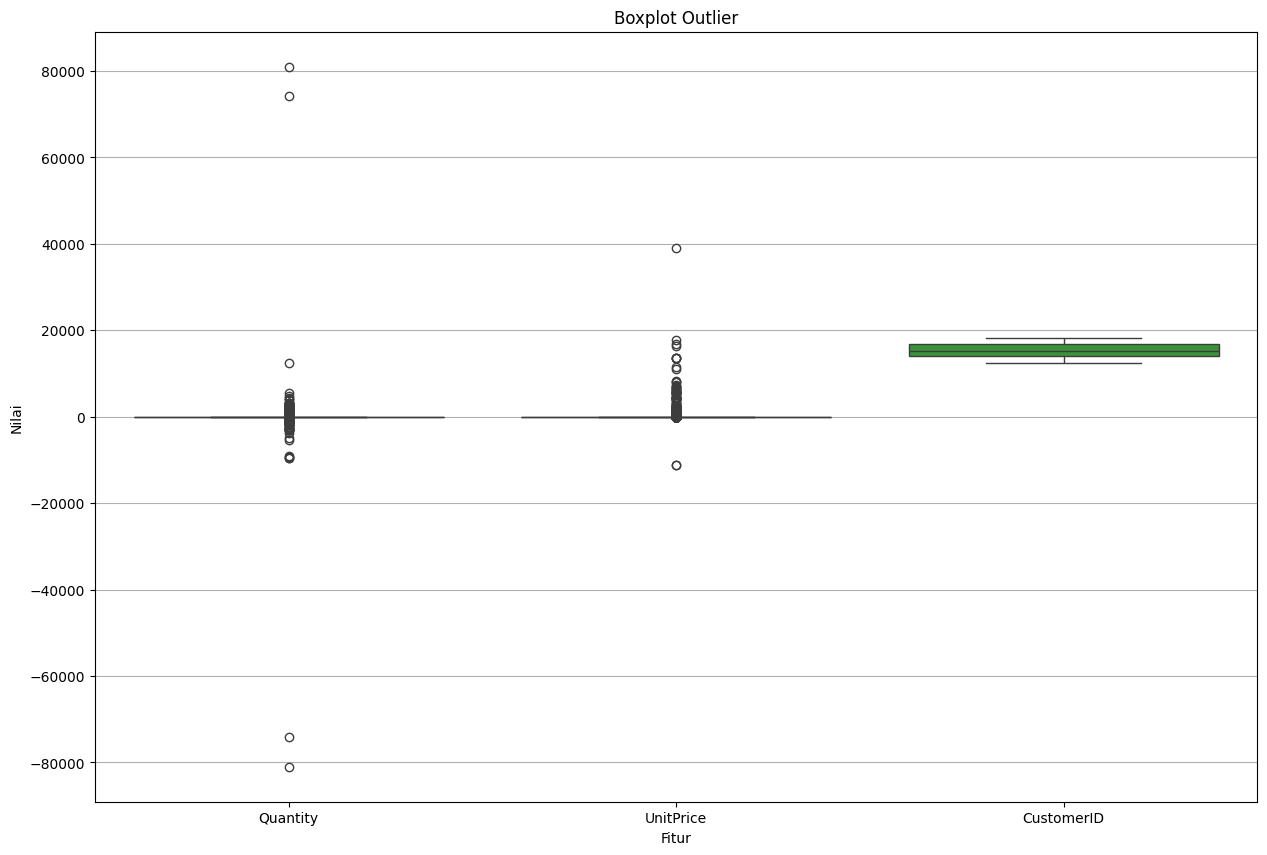

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="v")
plt.title('Boxplot Outlier')
plt.ylabel('Nilai')
plt.xlabel('Fitur')
plt.grid(True, axis='y')

plt.show()